<a href="https://colab.research.google.com/github/malikbaqi12/Applied-data-science-using-pyspark-code-files/blob/main/Variable_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Default Parameters

In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=997f3e8f64a7b4bf0255cebc8680bf59b2c542db56531c6ab4fca4bdcd2551e4
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [3]:
filename = "bank-full.csv"
target_variable_name = "y"

# Load Dataset

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv(filename, header=True, inferSchema=True, sep=';')
df.show()

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown|  single|  unknown|     no|      1|     no|  no|unknown|  5|  may

# Length of the data

In [6]:
df.count()

45211

# Describe data

In [7]:
df.describe().toPandas()

,summary,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
1,mean,40.93621021432837,None,None,None,None,1362.2720576850766,None,None,None,15.80641879188693,None,258.1630797814691,2.763840658246887,40.19782796222158,0.5803233726305546,None,None
2,stddev,10.618762040975408,None,None,None,None,3044.7658291685243,None,None,None,8.322476153044596,None,257.52781226517095,3.098020883279184,100.12874599059813,2.3034410449312204,None,None
3,min,18,admin.,divorced,primary,no,-8019,no,no,cellular,1,apr,0,1,-1,0,failure,no
4,max,95,unknown,single,unknown,yes,102127,yes,yes,unknown,31,sep,4918,63,871,275,unknown,yes


# Check Data types of each column

In [8]:
df.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('y', 'string')]

In [9]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



# Count the records by group

In [10]:
df.groupBy('education').count().show()

+---------+-----+
|education|count|
+---------+-----+
|  unknown| 1857|
| tertiary|13301|
|secondary|23202|
|  primary| 6851|
+---------+-----+



# Count the records by target

In [11]:
df.groupBy(target_variable_name).count().show()

+---+-----+
|  y|count|
+---+-----+
| no|39922|
|yes| 5289|
+---+-----+



# Group by Multiple columns

In [12]:
df.groupBy(['education',target_variable_name]).count().show()

+---------+---+-----+
|education|  y|count|
+---------+---+-----+
|  unknown| no| 1605|
| tertiary| no|11305|
|secondary| no|20752|
|  unknown|yes|  252|
|  primary| no| 6260|
|  primary|yes|  591|
|secondary|yes| 2450|
| tertiary|yes| 1996|
+---------+---+-----+



In [13]:
from pyspark.sql.functions import * 
df.groupBy(target_variable_name).agg({'balance':'avg', 'age': 'avg'}).show()

+---+------------------+------------------+
|  y|      avg(balance)|          avg(age)|
+---+------------------+------------------+
| no|1303.7149691899203| 40.83898602274435|
|yes|1804.2679145396105|41.670069956513515|
+---+------------------+------------------+



# Cardinality Check

In [14]:
from pyspark.sql.functions import approxCountDistinct, countDistinct

"""
Note: approxCountDistinct and countDistinct can be used interchangeably. Only difference is the computation time. 

"approxCountDistinct" is useful for large datasets 
"countDistinct" for small and medium datasets.

"""

def cardinality_calculation(df, cut_off=1):
    cardinality = df.select(*[approxCountDistinct(c).alias(c) for c in df.columns])
    
    ## convert to pandas for efficient calculations
    final_cardinality_df = cardinality.toPandas().transpose()
    final_cardinality_df.reset_index(inplace=True) 
    final_cardinality_df.rename(columns={0:'Cardinality'}, inplace=True) 
    
    #select variables with cardinality of 1
    vars_selected = final_cardinality_df['index'][final_cardinality_df['Cardinality'] <= cut_off] 
    
    return final_cardinality_df, vars_selected

cardinality_df, cardinality_vars_selected = cardinality_calculation(df)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/functions.py:2610: FutureWarning: Deprecated in 2.1, use approx_count_distinct instead.
  warnings.warn("Deprecated in 2.1, use approx_count_distinct instead.", FutureWarning)


In [15]:
cardinality_df

,index,Cardinality
0,age,76
1,job,11
2,marital,3
3,education,4
4,default,2
5,balance,7375
6,housing,2
7,loan,2
8,contact,3
9,day,32


In [16]:
cardinality_vars_selected

Series([], Name: index, dtype: object)

# Missing value check

In [17]:
#missing values check
from pyspark.sql.functions import count, when, isnan, col

# miss_percentage is set to 80% as discussed in the book
def missing_calculation(df, miss_percentage=0.80):
    
    #checks for both NaN and null values
    missing = df.select(*[count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
    length_df = df.count()
    ## convert to pandas for efficient calculations
    final_missing_df = missing.toPandas().transpose()
    final_missing_df.reset_index(inplace=True) 
    final_missing_df.rename(columns={0:'missing_count'}, inplace=True) 
    final_missing_df['missing_percentage'] = final_missing_df['missing_count']/length_df
    
    #select variables with cardinality of 1
    vars_selected = final_missing_df['index'][final_missing_df['missing_percentage'] >= miss_percentage] 
    
    return final_missing_df, vars_selected

In [18]:
missing_df, missing_vars_selected = missing_calculation(df)

In [19]:
missing_df

,index,missing_count,missing_percentage
0,age,0,0.0
1,job,0,0.0
2,marital,0,0.0
3,education,0,0.0
4,default,0,0.0
5,balance,0,0.0
6,housing,0,0.0
7,loan,0,0.0
8,contact,0,0.0
9,day,0,0.0


In [20]:
missing_vars_selected

Series([], Name: index, dtype: object)

# Identify variable types

In [21]:
def variable_type(df):
    
    vars_list = df.dtypes
    char_vars = []
    num_vars = []
    for i in vars_list:
        if i[1] in ('string'):
            char_vars.append(i[0])
        else:
            num_vars.append(i[0])
    
    return char_vars, num_vars

In [22]:
char_vars, num_vars = variable_type(df)

In [23]:
char_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [24]:
num_vars

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [25]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

def category_to_index(df, char_vars):
    
    char_df = df.select(char_vars)
    indexers = [StringIndexer(inputCol=c, outputCol=c+"_index", handleInvalid="keep") for c in char_df.columns]
    pipeline = Pipeline(stages=indexers)
    char_labels = pipeline.fit(char_df)
    df = char_labels.transform(df)
    return df, char_labels

In [26]:
df, char_labels = category_to_index(df, char_vars)

In [27]:
df.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('y', 'string'),
 ('job_index', 'double'),
 ('marital_index', 'double'),
 ('education_index', 'double'),
 ('default_index', 'double'),
 ('housing_index', 'double'),
 ('loan_index', 'double'),
 ('contact_index', 'double'),
 ('month_index', 'double'),
 ('poutcome_index', 'double'),
 ('y_index', 'double')]

In [28]:
df = df.select([c for c in df.columns if c not in char_vars])

In [29]:
def rename_columns(df, char_vars):
    mapping = dict(zip([i + '_index' for i in char_vars], char_vars))
    df = df.select([col(c).alias(mapping.get(c, c)) for c in df.columns])
    return df

In [30]:
df = rename_columns(df, char_vars)

In [31]:
df.dtypes

[('age', 'int'),
 ('balance', 'int'),
 ('day', 'int'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('job', 'double'),
 ('marital', 'double'),
 ('education', 'double'),
 ('default', 'double'),
 ('housing', 'double'),
 ('loan', 'double'),
 ('contact', 'double'),
 ('month', 'double'),
 ('poutcome', 'double'),
 ('y', 'double')]

In [32]:
df.groupBy('y').count().show() 

+---+-----+
|  y|count|
+---+-----+
|0.0|39922|
|1.0| 5289|
+---+-----+



# Assemble input vectors

In [33]:
from pyspark.ml.feature import VectorAssembler

#assemble individual columns to one column - 'features'
def assemble_vectors(df, features_list, target_variable_name):
    stages = []
    #assemble vectors
    assembler = VectorAssembler(inputCols=features_list, outputCol='features')
    stages = [assembler]
    #select all the columns + target + newly created 'features' column
    selectedCols = [target_variable_name, 'features'] + features_list
    #use pipeline to process sequentially
    pipeline = Pipeline(stages=stages)
    #assembler model
    assembleModel = pipeline.fit(df)
    #apply assembler model on data
    df = assembleModel.transform(df).select(selectedCols)

    return df

In [34]:
#exclude target variable and select all other feature vectors
features_list = df.columns
#features_list = char_vars #this option is used only for ChiSqselector
features_list.remove(target_variable_name)

In [35]:
features_list

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [36]:
# apply the function on our dataframe
df = assemble_vectors(df, features_list, target_variable_name)

In [37]:
df.show()

+---+--------------------+---+-------+---+--------+--------+-----+--------+----+-------+---------+-------+-------+----+-------+-----+--------+
|  y|            features|age|balance|day|duration|campaign|pdays|previous| job|marital|education|default|housing|loan|contact|month|poutcome|
+---+--------------------+---+-------+---+--------+--------+-----+--------+----+-------+---------+-------+-------+----+-------+-----+--------+
|0.0|(16,[0,1,2,3,4,5,...| 58|   2143|  5|     261|       1|   -1|       0| 1.0|    0.0|      1.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|
|0.0|(16,[0,1,2,3,4,5,...| 44|     29|  5|     151|       1|   -1|       0| 2.0|    1.0|      0.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|
|0.0|(16,[0,1,2,3,4,5,...| 33|      2|  5|      76|       1|   -1|       0| 7.0|    0.0|      0.0|    0.0|    0.0| 1.0|    1.0|  0.0|     0.0|
|0.0|(16,[0,1,2,3,4,5,...| 47|   1506|  5|      92|       1|   -1|       0| 0.0|    0.0|      3.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|

In [38]:
df.schema["features"].metadata["ml_attr"]["attrs"]

{'numeric': [{'idx': 0, 'name': 'age'},
  {'idx': 1, 'name': 'balance'},
  {'idx': 2, 'name': 'day'},
  {'idx': 3, 'name': 'duration'},
  {'idx': 4, 'name': 'campaign'},
  {'idx': 5, 'name': 'pdays'},
  {'idx': 6, 'name': 'previous'}],
 'nominal': [{'vals': ['blue-collar',
    'management',
    'technician',
    'admin.',
    'services',
    'retired',
    'self-employed',
    'entrepreneur',
    'unemployed',
    'housemaid',
    'student',
    'unknown',
    '__unknown'],
   'idx': 7,
   'name': 'job'},
  {'vals': ['married', 'single', 'divorced', '__unknown'],
   'idx': 8,
   'name': 'marital'},
  {'vals': ['secondary', 'tertiary', 'primary', 'unknown', '__unknown'],
   'idx': 9,
   'name': 'education'},
  {'vals': ['no', 'yes', '__unknown'], 'idx': 10, 'name': 'default'},
  {'vals': ['yes', 'no', '__unknown'], 'idx': 11, 'name': 'housing'},
  {'vals': ['no', 'yes', '__unknown'], 'idx': 12, 'name': 'loan'},
  {'vals': ['cellular', 'unknown', 'telephone', '__unknown'],
   'idx': 13,


In [39]:
import pandas as pd
for k, v in df.schema["features"].metadata["ml_attr"]["attrs"].items():
    features_df = pd.DataFrame(v)

In [40]:
features_df

,vals,idx,name
0,"[blue-collar, management, technician, admin., ...",7,job
1,"[married, single, divorced, __unknown]",8,marital
2,"[secondary, tertiary, primary, unknown, __unkn...",9,education
3,"[no, yes, __unknown]",10,default
4,"[yes, no, __unknown]",11,housing
5,"[no, yes, __unknown]",12,loan
6,"[cellular, unknown, telephone, __unknown]",13,contact
7,"[may, jul, aug, jun, nov, apr, feb, jan, oct, ...",14,month
8,"[unknown, failure, other, success, __unknown]",15,poutcome


# Scaled input vectors assembled

In [41]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

#assemble and scale individual columns to one column - 'features2'
def scaled_assemble_vectors(df, features_list, target_variable_name):
    stages = []
    #assemble vectors
    assembler = VectorAssembler(inputCols=features_list, outputCol='assembled_features')
    scaler = StandardScaler(inputCol=assembler.getOutputCol(), outputCol='features2')
    stages = [assembler, scaler]
    #select all the columns + target + newly created 'features' column
    selectedCols = [target_variable_name, 'features2'] + features_list
    #use pipeline to process sequentially
    pipeline = Pipeline(stages=stages)
    #assembler model
    scaleAssembleModel = pipeline.fit(df)
    #apply assembler model on data
    df = scaleAssembleModel.transform(df).select(selectedCols)
    return df

In [42]:
features_list = df.columns
features_list.remove(target_variable_name)

In [43]:
df = scaled_assemble_vectors(df, features_list, target_variable_name)

In [44]:
df.show()

+---+--------------------+--------------------+---+-------+---+--------+--------+-----+--------+----+-------+---------+-------+-------+----+-------+-----+--------+
|  y|           features2|            features|age|balance|day|duration|campaign|pdays|previous| job|marital|education|default|housing|loan|contact|month|poutcome|
+---+--------------------+--------------------+---+-------+---+--------+--------+-----+--------+----+-------+---------+-------+-------+----+-------+-----+--------+
|0.0|(32,[0,1,2,3,4,5,...|(16,[0,1,2,3,4,5,...| 58|   2143|  5|     261|       1|   -1|       0| 1.0|    0.0|      1.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|
|0.0|(32,[0,1,2,3,4,5,...|(16,[0,1,2,3,4,5,...| 44|     29|  5|     151|       1|   -1|       0| 2.0|    1.0|      0.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|
|0.0|(32,[0,1,2,3,4,5,...|(16,[0,1,2,3,4,5,...| 33|      2|  5|      76|       1|   -1|       0| 7.0|    0.0|      0.0|    0.0|    0.0| 1.0|    1.0|  0.0|     0.0|
|0.0|(32,[0,1,2,

# Inbuilt variable selection process – Without Target

# Principal Component analysis

In [45]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors

pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(df)

result = model.transform(df).select("pcaFeatures")
result.show(truncate=False)

+------------------------------------------------------------+
|pcaFeatures                                                 |
+------------------------------------------------------------+
|[-2143.495364773581,-257.0420740676505,1.2449712753048212]  |
|[-29.29226175164628,-150.92888640669165,1.0493026899279903] |
|[-2.150889773941882,-75.98191250436612,1.0760651955381237]  |
|[-1506.1823305908117,-89.21547154672699,1.2683999536976271] |
|[-1.3750908349448234,-197.98356175494823,0.9892427009816414]|
|[-231.26679712386618,-138.56034919503713,1.0576960891396285]|
|[-447.40727826756404,-216.16541383839743,1.0066666548031233]|
|[-2.7123264447442232,-379.97858281643545,0.875150469836819] |
|[-121.11144848214049,-49.75636025970778,1.172585359192404]  |
|[-593.1146061641075,-53.89364261832033,1.1817022732262128]  |
|[-270.4212341323417,-221.48699661827914,1.0170824073205755] |
|[-390.26081676654087,-136.27016909339133,1.0625336862699843]|
|[-6.967616100129188,-516.9674558248696,0.8003545768071

In [46]:
model.pc.toArray()

array([[-3.41021399e-04,  2.79524640e-04,  2.58353293e-03],
       [-9.99998245e-01,  1.83654726e-03,  1.13892524e-04],
       [-1.22934480e-05,  9.79995613e-04,  7.79347982e-03],
       [-1.83671689e-03, -9.99996986e-01, -7.36955549e-04],
       [ 1.48468991e-05,  1.01391994e-03,  2.75121381e-03],
       [-1.13085547e-04,  7.49207153e-04, -9.99889046e-01],
       [-1.26153895e-05, -6.36100089e-06, -1.04654388e-02],
       [-1.78789640e-05, -4.11817349e-05,  5.51411389e-04],
       [ 6.41085932e-06, -5.23364803e-05, -1.45349520e-04],
       [-1.11185424e-05,  1.30366514e-05,  2.01500982e-04],
       [ 2.91665702e-06,  4.42643869e-06,  3.95562163e-05],
       [-1.12221341e-05,  1.26153926e-05,  6.17569266e-04],
       [ 1.01623400e-05,  1.50687571e-05,  8.23933054e-05],
       [-5.68377754e-07,  6.95393403e-05,  1.03951369e-03],
       [-7.60886236e-05, -1.16754927e-04, -3.24662847e-03],
       [-8.55162111e-06, -6.01853226e-05, -4.94522998e-03]])

In [47]:
model.explainedVariance

DenseVector([0.9918, 0.0071, 0.0011])

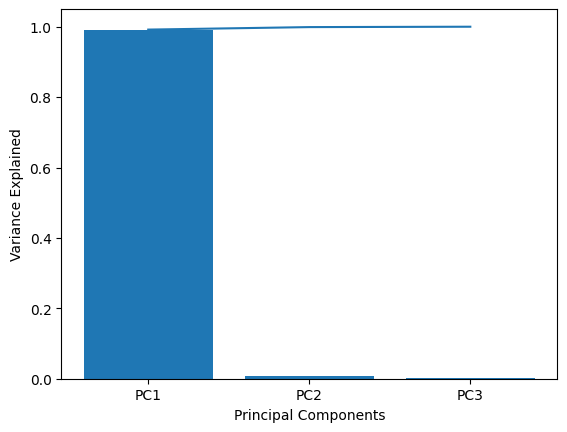

In [48]:
import matplotlib.pyplot as plt
import numpy as np
x = []
for i in range(0, len(model.explainedVariance)):
    x.append('PC' + str(i + 1))
y = np.array(model.explainedVariance)
z = np.cumsum(model.explainedVariance)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.bar(x, y)
plt.plot(x, z)

# Singular Value Decomposition

In [49]:
df_svd_vector = df.rdd.map(lambda x: x['features'].toArray())

In [50]:
df_svd_vector

PythonRDD[207] at RDD at PythonRDD.scala:53

In [51]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix

mat = RowMatrix(df_svd_vector)

# Compute the top 5 singular values and corresponding singular vectors.
svd = mat.computeSVD(5, computeU=True)
U = svd.U       # The U factor is a RowMatrix.
s = svd.s       # The singular values are stored in a local dense vector.
V = svd.V       # The V factor is a local dense matrix.

# Inbuilt variable selection process – With Target

# ChiSq selector

In [52]:
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.linalg import Vectors

selector = ChiSqSelector(numTopFeatures=6, featuresCol="features",
                         outputCol="selectedFeatures", labelCol="y")

chi_selector = selector.fit(df)
    
result = chi_selector.transform(df)

print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())
print("Selected Indices: ", chi_selector.selectedFeatures)
result.show()

ChiSqSelector output with top 6 features selected
Selected Indices:  [0, 1, 2, 3, 4, 5]
+---+--------------------+--------------------+---+-------+---+--------+--------+-----+--------+----+-------+---------+-------+-------+----+-------+-----+--------+--------------------+
|  y|           features2|            features|age|balance|day|duration|campaign|pdays|previous| job|marital|education|default|housing|loan|contact|month|poutcome|    selectedFeatures|
+---+--------------------+--------------------+---+-------+---+--------+--------+-----+--------+----+-------+---------+-------+-------+----+-------+-----+--------+--------------------+
|0.0|(32,[0,1,2,3,4,5,...|(16,[0,1,2,3,4,5,...| 58|   2143|  5|     261|       1|   -1|       0| 1.0|    0.0|      1.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|(6,[0,1,2,3,4,5],...|
|0.0|(32,[0,1,2,3,4,5,...|(16,[0,1,2,3,4,5,...| 44|     29|  5|     151|       1|   -1|       0| 2.0|    1.0|      0.0|    0.0|    0.0| 0.0|    1.0|  0.0|     0.0|(6,[0,1,2

In [53]:
chi_selector.selectedFeatures

[0, 1, 2, 3, 4, 5]

In [54]:
features_df['chisq_importance'] = features_df['idx'].apply(lambda x: 1 if x in chi_selector.selectedFeatures else 0)

In [55]:
features_df

,vals,idx,name,chisq_importance
0,"[blue-collar, management, technician, admin., ...",7,job,0
1,"[married, single, divorced, __unknown]",8,marital,0
2,"[secondary, tertiary, primary, unknown, __unkn...",9,education,0
3,"[no, yes, __unknown]",10,default,0
4,"[yes, no, __unknown]",11,housing,0
5,"[no, yes, __unknown]",12,loan,0
6,"[cellular, unknown, telephone, __unknown]",13,contact,0
7,"[may, jul, aug, jun, nov, apr, feb, jan, oct, ...",14,month,0
8,"[unknown, failure, other, success, __unknown]",15,poutcome,0


# Model based feature selection

In [56]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol='features', labelCol=target_variable_name)
rf_model = rf.fit(df)
rf_model.featureImportances

SparseVector(16, {0: 0.0253, 1: 0.0021, 2: 0.004, 3: 0.4447, 4: 0.0011, 5: 0.0345, 6: 0.027, 7: 0.0088, 8: 0.002, 9: 0.0021, 11: 0.0197, 12: 0.0001, 13: 0.02, 14: 0.1328, 15: 0.2759})

In [57]:
#temporary output rf_output
rf_output = rf_model.featureImportances
features_df['Importance'] = features_df['idx'].apply(lambda x: rf_output[x] if x in rf_output.indices else 0)

In [58]:
#sort values based on descending importance feature
features_df.sort_values("Importance", ascending=False, inplace=True)

In [59]:
features_df

,vals,idx,name,chisq_importance,Importance
8,"[unknown, failure, other, success, __unknown]",15,poutcome,0,0.275889
7,"[may, jul, aug, jun, nov, apr, feb, jan, oct, ...",14,month,0,0.132781
6,"[cellular, unknown, telephone, __unknown]",13,contact,0,0.020041
4,"[yes, no, __unknown]",11,housing,0,0.019682
0,"[blue-collar, management, technician, admin., ...",7,job,0,0.008770
2,"[secondary, tertiary, primary, unknown, __unkn...",9,education,0,0.002072
1,"[married, single, divorced, __unknown]",8,marital,0,0.001956
5,"[no, yes, __unknown]",12,loan,0,0.000088
3,"[no, yes, __unknown]",10,default,0,0.000000


Text(0, 0.5, 'Variable Importance')

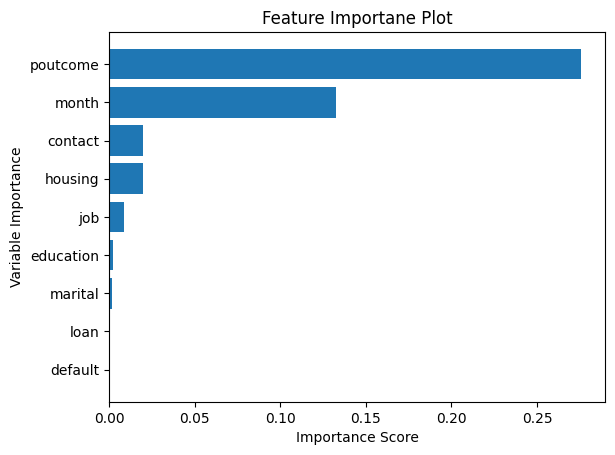

In [60]:
import matplotlib.pyplot as plt

features_df.sort_values("Importance", ascending=True, inplace=True)
plt.barh(features_df['name'], features_df['Importance'])
plt.title("Feature Importane Plot")
plt.xlabel("Importance Score")
plt.ylabel("Variable Importance")

# Correlation function

In [61]:
from pyspark.mllib.stat import Statistics

correlation_type = 'pearson' # 'pearson', 'spearman'

In [62]:
for k, v in df.schema["features"].metadata["ml_attr"]["attrs"].items():
    features_df = pd.DataFrame(v)
column_names = list(features_df['name'])

In [63]:
column_names

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [64]:
df_vector = df.rdd.map(lambda x: x['features'].toArray())

In [65]:
matrix = Statistics.corr(df_vector, method=correlation_type)

In [68]:
#import pandas as pd
#corr_df = pd.DataFrame(matrix, columns=column_names, index=column_names)

In [69]:
import pandas as pd

# define matrix and column_names list
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
column_names = ['A', 'B', 'C']

# create DataFrame
corr_df = pd.DataFrame(matrix, columns=column_names, index=column_names)


In [70]:
corr_df

,A,B,C
A,1,2,3
B,4,5,6
C,7,8,9


In [71]:
final_corr_df = pd.DataFrame(corr_df.abs().unstack().sort_values(kind='quicksort')).reset_index()
final_corr_df.rename({'level_0': 'col1', 'level_1': 'col2', 0: 'correlation_value'}, axis=1, inplace=True)
final_corr_df = final_corr_df[final_corr_df['col1'] != final_corr_df['col2']]
final_corr_df

,col1,col2,correlation_value
1,B,A,2
2,C,A,3
3,A,B,4
5,C,B,6
6,A,C,7
7,B,C,8


In [72]:
correlation_cutoff = 0.65 #custom parameter
final_corr_df[final_corr_df['correlation_value'] > correlation_cutoff]

,col1,col2,correlation_value
1,B,A,2
2,C,A,3
3,A,B,4
5,C,B,6
6,A,C,7
7,B,C,8


In [73]:
# Import the estimator and transformer class
from pyspark.ml import Estimator, Transformer

# Parameter sharing class. We will use this for input column
from pyspark.ml.param.shared import HasInputCol

# Statistics class to calculate correlation
from pyspark.mllib.stat import Statistics
import pandas as pd

# custom class definition
class CustomCorrelation(Estimator, Transformer, HasInputCol):
    """
    A custom function to calculate the correlation between two variables.
    
    Parameters:
    -----------
    inputCol: default value (None)
        Feature column name to be used for the correlation purpose. The input column should be assembled vector.
        
    correlation_type: 'pearson' or 'spearman'
    
    correlation_cutoff: float, default value (0.7), accepted values 0 to 1
        Columns more than the specified cutoff will be displayed in the output dataframe. 
    """
    
    # Initialize parameters for the function
    def __init__(self, inputCol=None, correlation_type='pearson', correlation_cutoff=0.7):
        
        super(CustomCorrelation, self).__init__()
        
        assert inputCol, "Please provide a assembled feature column name"
        
        #self.inputCol is class parameter
        self.inputCol = inputCol 
        
        assert correlation_type == 'pearson' or correlation_type == 'spearman', "Please provide \
                                a valid option for correlation type. 'pearson' or 'spearman'. "
        
        #self.correlation_type is class parameter
        self.correlation_type = correlation_type
        
        assert 0.0 <= correlation_cutoff <= 1.0, "Provide a valid value for cutoff. Accepted range is 0 to 1" 
        
        #self.correlation_cutoff is class parameter
        self.correlation_cutoff = correlation_cutoff
        
    # Estimator function, method inside a class, '_fit' - protected parameter
    def _fit(self, df):
        
        for k, v in df.schema[self.inputCol].metadata["ml_attr"]["attrs"].items():
            features_df = pd.DataFrame(v)
            
        #self.column_names is class parameter, created for future use
        self.column_names = list(features_df['name'])
        
        df_vector = df.rdd.map(lambda x: x[self.inputCol].toArray())
        
        #self.matrix is class parameter, created for future use
        self.matrix = Statistics.corr(df_vector, method=correlation_type)
        return self
    
    # Transformer function, method inside a class, '_transform' - protected parameter
    def _transform(self, df):
        
        # making sure the estimator is called before transform
        try:
            if self.matrix:
                pass
        except:
            raise ValueError("Estimator has to be fitted to get the correlation results")
        
        # apply pandas dataframe operation on the fit output
        corr_df = pd.DataFrame(self.matrix, columns=self.column_names, index=self.column_names)
        final_corr_df = pd.DataFrame(corr_df.abs().unstack().sort_values(kind='quicksort')).reset_index()
        final_corr_df.rename({'level_0': 'col1', 'level_1': 'col2', 0: 'correlation_value'}, axis=1, inplace=True)
        final_corr_df = final_corr_df[final_corr_df['col1'] != final_corr_df['col2']]
        
        #shortlisted dataframe based on custom cutoff
        shortlisted_corr_df = final_corr_df[final_corr_df['correlation_value'] > self.correlation_cutoff]
        return corr_df, shortlisted_corr_df

In [88]:
from customcorrelation import CustomCorrelation
clf = CustomCorrelation(inputCol='features')
output, shorlisted_output = clf.transform(df)


In [89]:
output

,col1,col2,col3
col1,1.0,1.0,1.0
col2,1.0,1.0,1.0
col3,1.0,1.0,1.0


In [90]:
shorlisted_output

,col1,col2,correlation_value
1,col1,col2,1.0
2,col1,col3,1.0
3,col2,col1,1.0
5,col2,col3,1.0
6,col3,col1,1.0
7,col3,col2,1.0


# Pipeline Compatability for custom Transformers

In [101]:
#exclude target variable and select all other feature vectors
#features_list = df.columns
#features_list.remove(target_variable_name)

In [100]:
# specify the name of the target variable
target_variable_name = "target_variable_name"

# check if the target variable is in the list of columns
if target_variable_name in df.columns:
    # exclude target variable and select all other feature vectors
    features_list = [col for col in df.columns if col != target_variable_name]
else:
    print(f"{target_variable_name} not found in columns")


target_variable_name not found in columns


In [102]:
from pyspark.ml.feature import VectorAssembler
from customcorrelation import CustomCorrelation
from pyspark.ml import Pipeline

stages = []

#assemble vectors
assembler = VectorAssembler(inputCols=features_list, outputCol='features')
custom_corr = CustomCorrelation(inputCol=assembler.getOutputCol())

In [103]:
stages = [assembler, custom_corr]

#use pipeline to process sequentially
pipeline = Pipeline(stages=stages)

In [104]:
#pipeline model
pipelineModel = pipeline.fit(df)

In [110]:
#output, shorlisted_output = pipelineModel.transform(df)




In [112]:
if "features" in df.columns:
    output, shorlisted_output = pipelineModel.transform(df)
else:
    print("The 'features' column does not exist in the DataFrame.")


The 'features' column does not exist in the DataFrame.


In [113]:
shorlisted_output

,col1,col2,correlation_value
1,col1,col2,1.0
2,col1,col3,1.0
3,col2,col1,1.0
5,col2,col3,1.0
6,col3,col1,1.0
7,col3,col2,1.0
